In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
cross = pd.read_csv('results/Cross_results.csv')
intra = pd.read_csv('results/Intra_results.csv')


In [33]:
max_accuracy_cross = cross.loc[cross['acc'].idxmax()]

# Print the resulting DataFrame
print(max_accuracy_cross)

Unnamed: 0        0.0000
lr                0.0010
hidden_size     150.0000
downsampling      1.0000
acc               0.9375
Name: 20, dtype: float64


In [34]:
max_accuracy_intra = intra.loc[intra['acc'].idxmax()]

# Print the resulting DataFrame
print(max_accuracy_intra)

Unnamed: 0        0.00
lr                0.01
hidden_size     100.00
downsampling      1.00
acc               1.00
Name: 0, dtype: float64


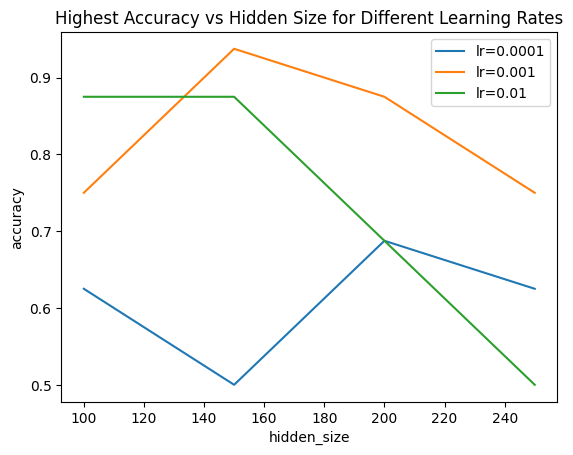

In [35]:
# Keep rows with the highest accuracy for each combination of 'hidden_size' and 'lr'
max_accuracy_indices = cross.groupby(['lr', 'hidden_size'])['acc'].idxmax()
filtered_cross = cross.loc[max_accuracy_indices]

# Plotting
fig, ax = plt.subplots()

# Iterate over unique values of 'lr'
for lr_value, group_df in filtered_cross.groupby('lr'):
    ax.plot(group_df['hidden_size'], group_df['acc'], label=f'lr={lr_value}')

# Set labels and title
ax.set_xlabel('hidden_size')
ax.set_ylabel('accuracy')
ax.set_title('Highest Accuracy vs Hidden Size for Different Learning Rates')

# Show legend
ax.legend()

# Show the plot
plt.show()

In [36]:
filtered_cross

,Unnamed: 0,lr,hidden_size,downsampling,acc
34,0,0.0001,100,15,0.6250
36,0,0.0001,150,1,0.5000
40,0,0.0001,200,1,0.6875
47,0,0.0001,250,30,0.6250
18,0,0.0010,100,15,0.7500
20,0,0.0010,150,1,0.9375
25,0,0.0010,200,5,0.8750
30,0,0.0010,250,15,0.7500
3,0,0.0100,100,30,0.8750
6,0,0.0100,150,15,0.8750


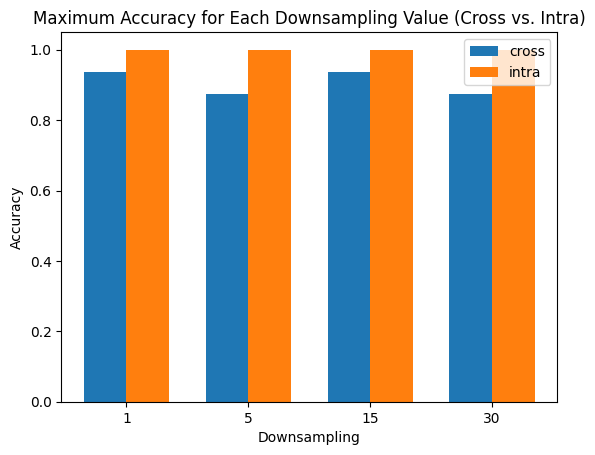

In [41]:
# Find the row with the maximum accuracy for each downsampling value
max_accuracy_rows_cross = cross.loc[cross.groupby('downsampling')['acc'].idxmax()]
max_accuracy_rows_intra = intra.loc[intra.groupby('downsampling')['acc'].idxmax()]

# Plotting
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.35

# Bar plot for each downsampling value
downsampling_values = [1, 5, 15, 30]
# Bar plot for 'cross'
positions_cross = np.arange(len(downsampling_values))
ax.bar(positions_cross, max_accuracy_rows_cross.groupby('downsampling')['acc'].max(), width=bar_width, label='cross')

# Bar plot for 'intra'
positions_intra = positions_cross + bar_width
ax.bar(positions_intra, max_accuracy_rows_intra.groupby('downsampling')['acc'].max(), width=bar_width, label='intra')

# Set labels and title
ax.set_xlabel('Downsampling')
ax.set_ylabel('Accuracy')
ax.set_title('Maximum Accuracy for Each Downsampling Value (Cross vs. Intra)')

# Manually set x-axis ticks and labels
ax.set_xticks(positions_cross + bar_width / 2)
ax.set_xticklabels(downsampling_values)

# Show legend
ax.legend()

# Show the plot
plt.show()

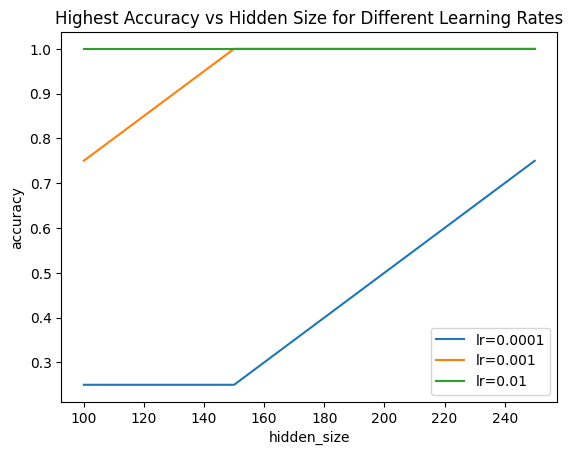

In [ ]:
# Keep rows with the highest accuracy for each combination of 'hidden_size' and 'lr'
max_accuracy_indices_intra = intra.groupby(['lr', 'hidden_size'])['acc'].idxmax()
filtered_intra = intra.loc[max_accuracy_indices_intra]

# Plotting
fig, ax = plt.subplots()

# Iterate over unique values of 'lr'
for lr_value, group_df in filtered_intra.groupby('lr'):
    ax.plot(group_df['hidden_size'], group_df['acc'], label=f'lr={lr_value}')

# Set labels and title
ax.set_xlabel('hidden_size')
ax.set_ylabel('accuracy')
ax.set_title('Highest Accuracy vs Hidden Size for Different Learning Rates')

# Show legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
filtered_intra

,Unnamed: 0,lr,hidden_size,downsampling,acc
16,0,0.0001,100,15,0.25
18,0,0.0001,150,15,0.25
20,0,0.0001,200,15,0.50
22,0,0.0001,250,15,0.75
8,0,0.0010,100,15,0.75
10,0,0.0010,150,15,1.00
12,0,0.0010,200,15,1.00
14,0,0.0010,250,15,1.00
0,0,0.0100,100,15,1.00
2,0,0.0100,150,15,1.00
